# Análise de dados de uma Turbina do Setor de Energia

Dados da turbina eólica no Kaggle. Ele tem dados que seguiram a curva e outros fora da curva. O objetivo é ler o artigo/dados, verificar visualmente quem está fora da performance da curva e o que está dentro do limite aceitável.

**Fonte**: https://www.kaggle.com/datasets/berkerisen/wind-turbine-scada-dataset?resource=download

### Passo 1 - Importar arquivos

In [1]:
#Importando bibliotecas

import pandas as pd
import seaborn as sns  # como se fosse expansão do matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure  #função específica dentro do Pyplot

### Passo 2 - Ler o arquivo

In [2]:
turbina = pd.read_csv('T1.csv')

#Renomear as colunas
turbina.columns = ['Data/Hora','Potência(kW)','VelocidadeVento(m/s)','CurvaTeórica(KWh)','DireçãoVento(°)']  

# Remover coluna da direção do vento
del turbina['DireçãoVento(°)']

# Mudar a coluna Data/Hora para DateTime - armazena as alterações na mesma coluna

turbina['Data/Hora'] = pd.to_datetime(turbina['Data/Hora'])

#Display
display(turbina)

,Data/Hora,Potência(kW),VelocidadeVento(m/s),CurvaTeórica(KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


### Passo 3 - Plotar os dados em um gráfico - Real

<AxesSubplot:xlabel='VelocidadeVento(m/s)', ylabel='Potência(kW)'>

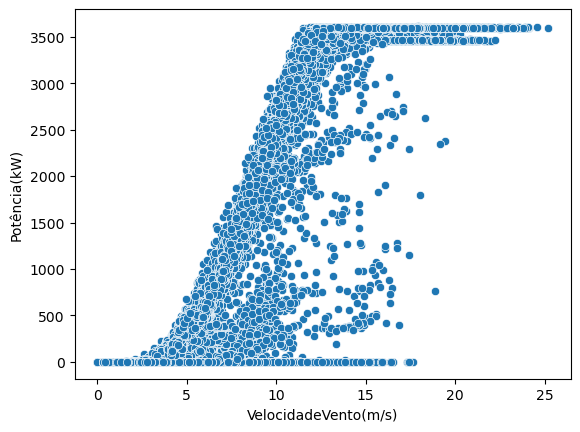

In [3]:
# Scatterplot - gráfico de dispersão - seaborn

# data - Extrai os dados dentro da planilha turbina. 
# eixo X da velocidade do vento
# eixo y da potência
# ctrl + enter
# cada ponto significa para x de velocidade do vento, foi gerado y de potência ativa no momento

sns.scatterplot(data=turbina, x='VelocidadeVento(m/s)', y='Potência(kW)')



### Passo 4 - Plotar os dados em um gráfico - Teórica

<AxesSubplot:xlabel='VelocidadeVento(m/s)', ylabel='CurvaTeórica(KWh)'>

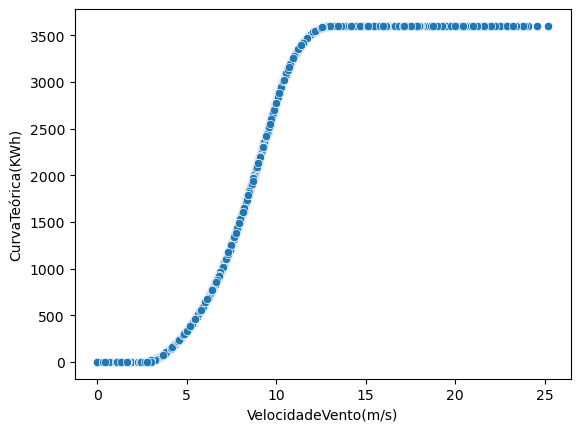

In [4]:
# Gráfico para curva teórica

# exemplo - para 10m/s gera aprox. 2500 KWh de energia
# O gráfico mostra o formato da curva que deveria ser feita caso não tivesse problema na turbina eólica

sns.scatterplot(data=turbina, x='VelocidadeVento(m/s)', y='CurvaTeórica(KWh)')

### Passo 5 - Criar limites "aceitáveis"

In [5]:
# Definir um limite aceitável 
# verificar se está dentro do limite aceitável ou não
# a potência não está gerando o quanto deveria gerar

# Transformar a coluna Potência numa lista

potencia_real = turbina['Potência(kW)'].to_list()
potencia_teorica = turbina['CurvaTeórica(KWh)'].to_list()


# Criar uma lista de potência máxima e outra de potência mínima
pot_max=[]
pot_min=[]
dentro_limite=[]

# para cada potência da lista teórica;
# limite superior - potência max 1.05 - 5% a mais(aumentar) - 100+5 = 105 - 1.05 % 
# limite inferior - potência min 0.95 - 5% a menos(diminuir) - 100-5 = 95 - 0.95%

for potencia in potencia_teorica:
    pot_max.append(potencia*1.05)  #adiciona na lista acima pot_max
    pot_min.append(potencia*0.95)  
    
#Comparar se os valores estão dentro ou fora da potência    
for p, potencia in enumerate(potencia_real):  #para cada indice[p] potencia que tiver dentro de potencia real
    if potencia >= pot_min[p] and potencia <=pot_max[p]:  
        dentro_limite.append('Dentro')
    elif potencia == 0:
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')


print(dentro_limite.count('Dentro')/len(dentro_limite))  #só 37% está dentro do limite estabelecido, o restante está fora(seja zerado ou com ineficiência)

0.37286760340391845


### Passo 6 - Adicionar lista "dentro_limite" ao DataFrame

In [6]:
# Inserir os valores de dentro e fora ao DataFrame
# turbina -> nome do DataFrame
# 'dentro_limite' -> nome da nova coluna das informações dos limites feitos acima(dentro,fora,zero)

turbina['Dentro_limite'] = dentro_limite
display(turbina)

,Data/Hora,Potência(kW),VelocidadeVento(m/s),CurvaTeórica(KWh),Dentro_limite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


### Passo 7 - Plotando novamente o gráfico

<AxesSubplot:xlabel='VelocidadeVento(m/s)', ylabel='Potência(kW)'>

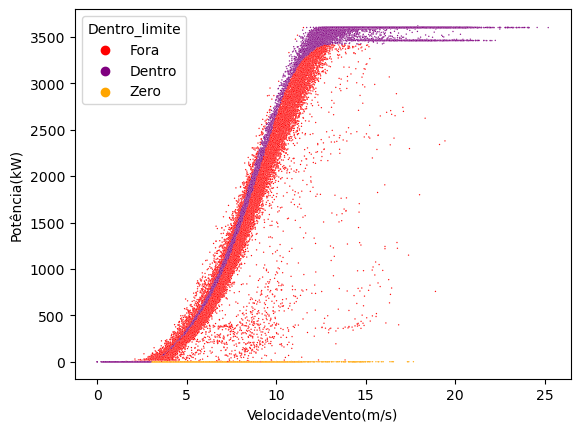

In [7]:
# Gráfico

# Inserir um novo argumento com as informações criadas acima -: hue = 'Nome da nova coluna'
# s -> tamanho das "bolinhas"
# cores -> define  dicionário de cores para 'Dentro', 'Zero' e 'Fora'
# palette -> cores -> atribui o dicionário criado acima à variável cores

cores = {'Dentro': 'purple','Fora':'red','Zero':'orange'}
sns.scatterplot(data=turbina, x='VelocidadeVento(m/s)', y='Potência(kW)', hue='Dentro_limite', s=1, palette=cores)
